In [1]:
from config import config

import pickle

import pandas as pd

In [2]:
with open(config["data"]["path"], "rb") as file:
    df = pickle.load(file)
    
print(type(df))

df.head()

<class 'pandas.core.frame.DataFrame'>


,name,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,location,favorites,genre_count
0,-0,"[{'mal_id': 39764, 'title': 'Detective Conan M...","[{'title': '1', 'mal_id': 29978, 'score': 6, '...",467,181.6,0,11160,7.74,0,7,0,477,3,NaT,NaN,NaT,NaT,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 153, 'Adventure': 162, 'Cars': 5, '..."
1,-Droid-,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '11eyes', 'mal_id': 6682, 'score': ...",1125,263.3,4,16195,7.80,4,1131,53,2271,7,1930-01-07,Male,1930-01-07,1930-01-07,MA,"{'anime': [{'mal_id': 237, 'title': 'Koukyoush...","{'Action': 447, 'Adventure': 186, 'Cars': 1, '..."
2,-Hentai,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05,Male,1991-11-05,1991-11-05,UAE - Sharjah,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '..."
3,-Jens,"[{'mal_id': 31646, 'title': '3-gatsu no Lion'}...","[{'title': '07-Ghost', 'mal_id': 5525, 'score'...",102,17.8,0,1093,6.81,8,403,0,518,5,NaT,NaN,NaT,NaT,Fish tank. I'm stuck.,"{'anime': [{'mal_id': 205, 'title': 'Samurai C...","{'Action': 36, 'Adventure': 9, 'Cars': 0, 'Com..."
4,-Kano,"[{'mal_id': 34777, 'title': '91 Days: Toki no ...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",193,65.2,25,3961,6.92,32,70,2,325,5,NaT,NaN,NaT,NaT,NaN,"{'anime': [], 'characters': [], 'people': []}","{'Action': 84, 'Adventure': 25, 'Cars': 0, 'Co..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              2195 non-null   object        
 1   planning          2195 non-null   object        
 2   watched           2195 non-null   object        
 3   completed         2195 non-null   int64         
 4   days_watched      2195 non-null   float64       
 5   dropped           2195 non-null   int64         
 6   episodes_watched  2195 non-null   int64         
 7   mean_score        2195 non-null   float64       
 8   on_hold           2195 non-null   int64         
 9   plan_to_watch     2195 non-null   int64         
 10  rewatched         2195 non-null   int64         
 11  total_entries     2195 non-null   int64         
 12  watching          2195 non-null   int64         
 13  birthday          1261 non-null   datetime64[ns]
 14  gender            1751 n

In [4]:
target_column = "gender";
df.gender.value_counts()

Male          1270
Female         456
Non-Binary      25
Name: gender, dtype: int64

In [5]:
df = df[df["gender"].notna()]
df = df[df["completed"] > config["min_completed"]]

In [6]:
predict_columns = ["completed", "days_watched", "episodes_watched", "mean_score"]
target_column = "gender"
df = df[predict_columns + [target_column]]

In [7]:
df.head()

,completed,days_watched,episodes_watched,mean_score,gender
1,1125,263.3,16195,7.80,Male
2,887,270.4,16189,7.36,Male
5,594,201.2,12248,5.42,Male
6,433,51.8,3252,5.36,Female
7,227,44.7,2799,7.96,Female


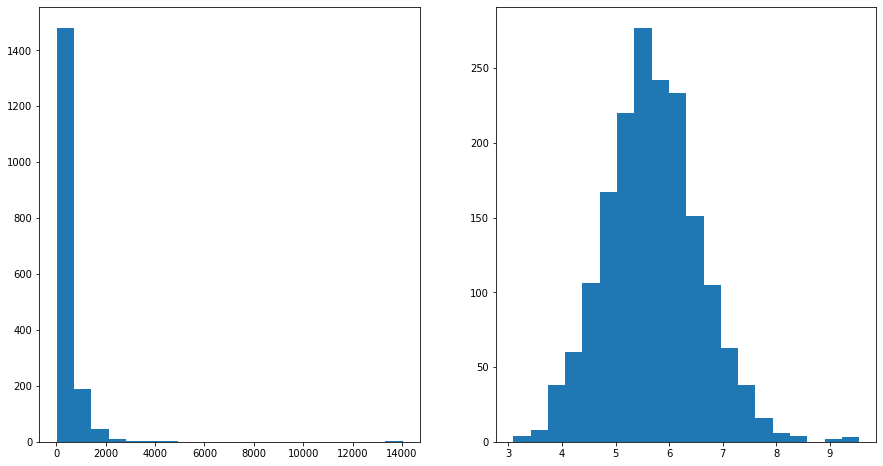

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15, 8)

def draw_x_and_logx(x):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.hist(x, bins=20)
    ax2.hist(np.log(x), bins=20)
    plt.show()

draw_x_and_logx(df.completed)

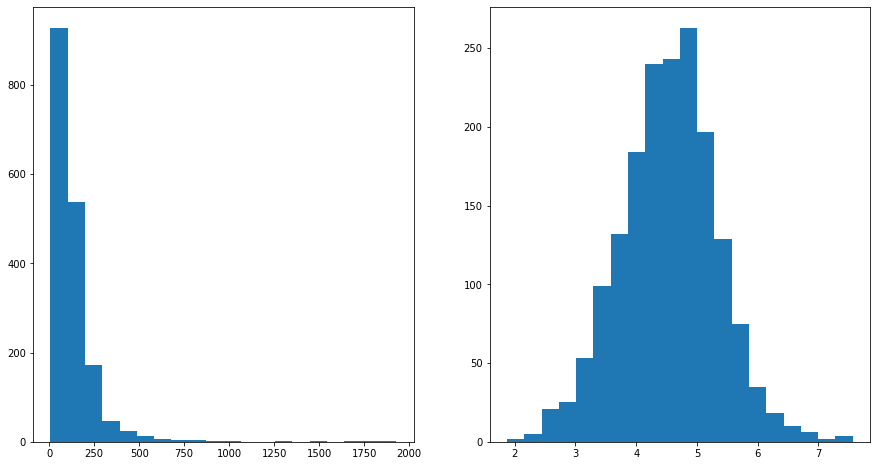

In [9]:
draw_x_and_logx(df.days_watched)

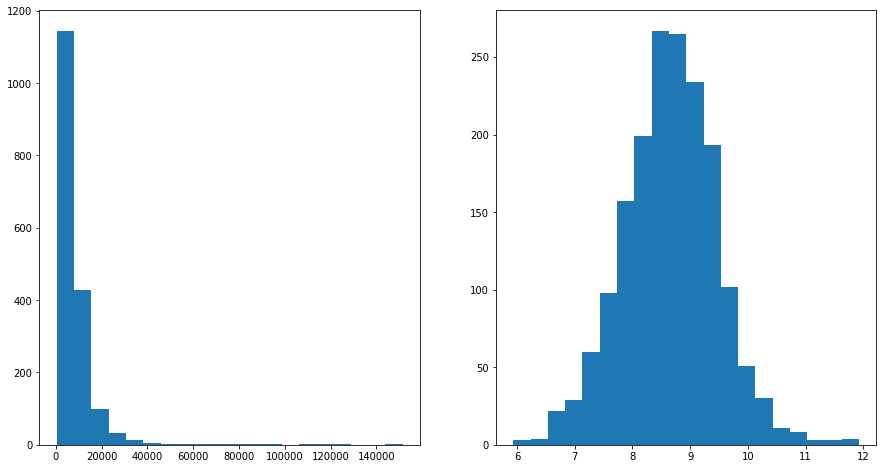

In [10]:
draw_x_and_logx(df.episodes_watched)

<AxesSubplot:>

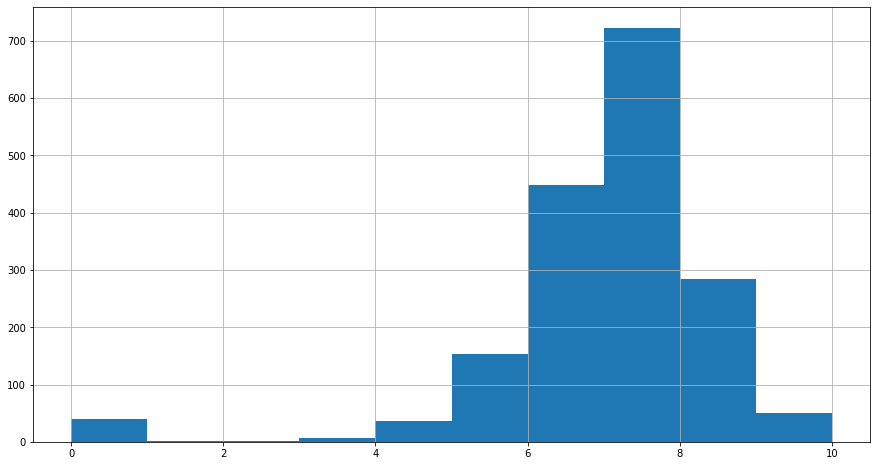

In [11]:
df.mean_score.hist()

In [12]:
import scipy.stats

def normal_test(x, level=0.05):
    plevel = scipy.stats.normaltest(x)[1]
    print("Normal" if scipy.stats.normaltest(x)[1] > level else "Non-normal", plevel)

In [13]:
print("All:")
for column in predict_columns:
    print(column, ": ", end='\t')
    normal_test(df[column])
    
print("\nSamples:")
for column in predict_columns:
    print(column, ": ", end='\t')
    normal_test(df[column].sample(frac=config["sampling_frac"], random_state=config["random_state"]))
    
print("\nLog:")
for column in predict_columns:
    print(column, ": ", end='\t')
    normal_test(np.log(df[column]))
    
print("\nLog samples:")
for column in predict_columns:
    print(column, ": ", end='\t')
    normal_test(np.log(df[column].sample(frac=config["sampling_frac"], random_state=config["random_state"])))

All:
completed : 	Non-normal 0.0
days_watched : 	Non-normal 0.0
episodes_watched : 	Non-normal 0.0
mean_score : 	Non-normal 5.204348690113139e-209

Samples:
completed : 	Non-normal 5.971075229980175e-17
days_watched : 	Non-normal 2.4173141817160695e-19
episodes_watched : 	Non-normal 1.6860836744521504e-20
mean_score : 	Normal 0.18604873271454173

Log:
completed : 	Non-normal 8.949731044166509e-09
days_watched : 	Non-normal 0.014774990111064168
episodes_watched : 	Non-normal 9.878191762356089e-05
mean_score : 	Non-normal nan

Log samples:
completed : 	Normal 0.8346329211538157
days_watched : 	Normal 0.9159325978019277
episodes_watched : 	Normal 0.9029639101592221
mean_score : 	Non-normal 0.0007273839906905591


C:\Program Files\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Program Files\Python39\lib\site-packages\scipy\stats\stats.py:951: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [14]:
df["completed_log"] = np.log(df["completed"])
df["days_watched_log"] = np.log(df["days_watched"])
df["episodes_watched_log"] = np.log(df["episodes_watched"])

In [15]:
predict_columns = ["completed_log", "days_watched_log", "episodes_watched_log", "mean_score"]
target_column = "gender"
df = df[predict_columns + [target_column]]

In [16]:
df.describe()

,completed_log,days_watched_log,episodes_watched_log,mean_score
count,1743.000000,1743.000000,1743.000000,1743.000000
mean,5.697113,4.538606,8.656951,7.031285
std,0.879275,0.797573,0.815138,1.480195
min,3.091042,1.871802,5.934894,0.000000
25%,5.123964,4.020877,8.136811,6.560000
50%,5.655992,4.566429,8.670429,7.240000
75%,6.240274,5.052417,9.191158,7.850000
max,9.548597,7.564446,11.928169,10.000000


(array(['Female', 'Male', 'Non-Binary'], dtype=object), array([ 453, 1265,   25], dtype=int64))


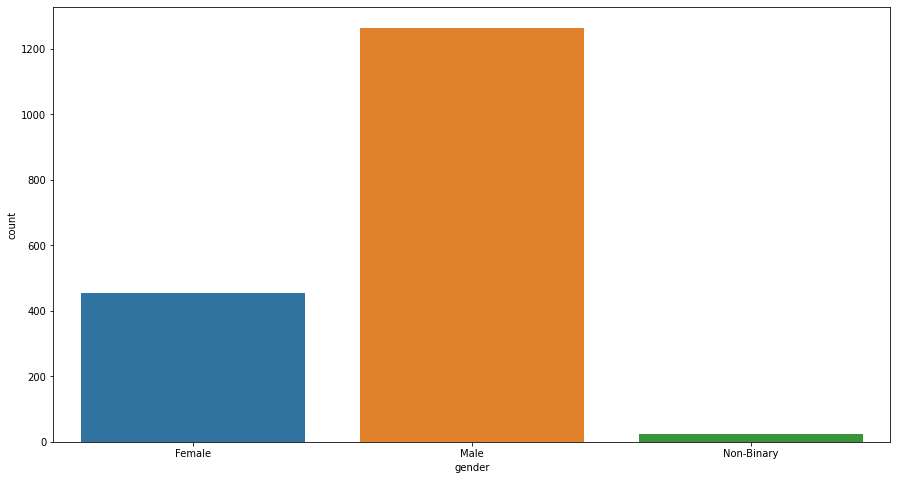

In [17]:
import seaborn as sns
print(np.unique(df.gender, return_counts=True))
sns.countplot(x='gender', data=df);

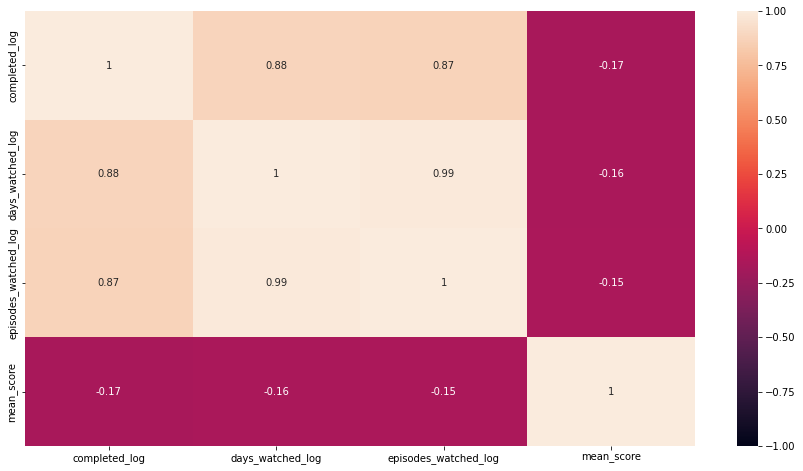

In [18]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

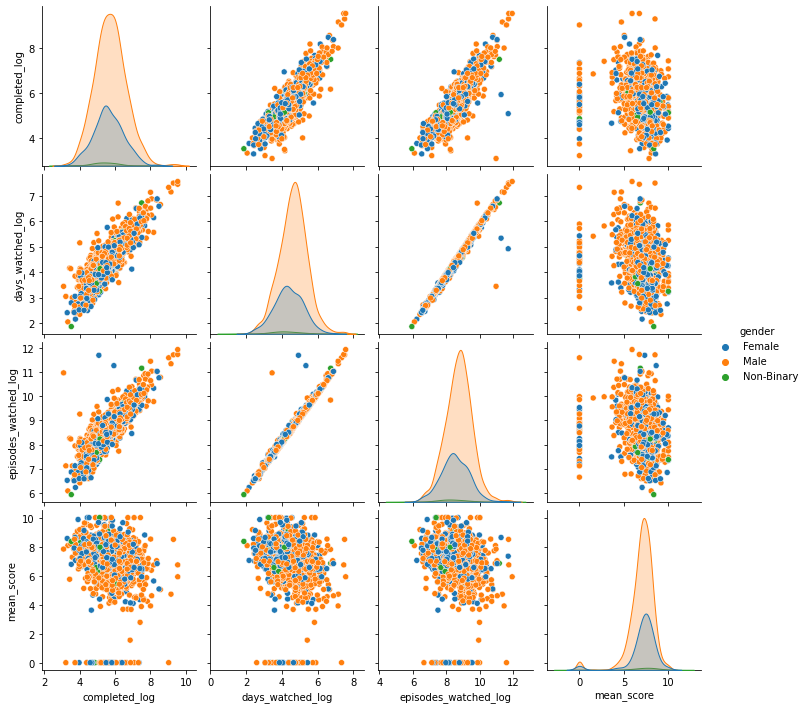

In [19]:
sns.pairplot(df, hue='gender');

In [20]:
df = df.drop(columns=["episodes_watched_log"])

In [21]:
df.head()

,completed_log,days_watched_log,mean_score,gender
1,7.025538,5.573294,7.80,Male
2,6.787845,5.599902,7.36,Male
5,6.386879,5.304299,5.42,Male
6,6.070738,3.947390,5.36,Female
7,5.424950,3.799974,7.96,Female


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import ComplementNB

In [34]:
X = df.drop(columns=["gender"]).values
y = df.gender.values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=config["random_state"], test_size=config["test_frac"])

In [36]:
models = [SVC(random_state=config["random_state"]), KNeighborsClassifier(), RandomForestClassifier(random_state=config["random_state"]), ComplementNB()]
y_pred = []

for model in models:
    model.fit(X_train, y_train)
    y_pred.append(model.predict(X_test))

In [43]:
def print_scores(model_name, index):
    print(model_name)
    print("f1:", metrics.f1_score(y_test, y_pred[index], average="weighted"))
    print("recall:", metrics.recall_score(y_test, y_pred[index], average="weighted"))
    print("balanced_accuracy:", metrics.balanced_accuracy_score(y_test, y_pred[index]))
    print("===================")
    
print_scores("SVC", 0)
print_scores("KNeighbors", 1)
print_scores("RandomForest", 2)
print_scores("ComplementNB", 3)

SVC
f1: 0.5866137189669429
recall: 0.7077363896848138
balanced_accuracy: 0.3333333333333333
KNeighbors
f1: 0.6216038874072202
recall: 0.6561604584527221
balanced_accuracy: 0.3522267206477732
RandomForest
f1: 0.5860657473146358
recall: 0.6389684813753582
balanced_accuracy: 0.3225371120107962
ComplementNB
f1: 0.53483524230221
recall: 0.5157593123209169
balanced_accuracy: 0.3616734143049933
